In [1]:
# Basic Imports
import sys
sys.path.insert(1, "../../")

import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Evaluation Imports
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Configurations
isDemoMode = True
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]

In [3]:
print(f"Default number of DF columns displayed {pd.get_option('display.max_columns')}")

# settings to display all columns
pd.set_option("display.max_columns", None)

Default number of DF columns displayed 20


In [4]:
df = pd.read_csv(DATA_FILE_NAME)
df = df[::60]
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.00,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
60,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,1635530994,62394.14,60962.99,5204.297994,56425.00,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
120,120,627127fabbd592fa2c7f2621,62971.54,62123.32,1635534444,62110.79,61347.36,4476.700494,59542.11,62124.20,60608.95,62123.32,0.003650,62118.99,62123.32,62118.99,21000000.0,18858125.0,18858125.0,62111.423525,3.865841e+10,-12.9838,-0.502020,3.646022,2.854153,26.873643,27.902601,49.983726,1.171305e+12,43.4826,1.304340e+12,0.163515
180,180,627127fabbd592fa2c7f265d,62971.54,62359.36,1635538303,62350.16,61408.04,4408.004663,60154.53,62359.36,60608.95,62380.94,0.532779,62340.30,62374.66,62380.94,21000000.0,18858212.0,18858212.0,62366.249249,3.727366e+10,-18.5644,0.375498,0.439496,1.973032,26.873643,28.332142,49.849687,1.176116e+12,43.4826,1.309691e+12,0.000000
240,240,627127fabbd592fa2c7f2699,62971.54,62480.44,1635541805,62463.78,61413.17,4217.489249,60154.53,62480.44,60608.95,62480.44,0.000000,62480.44,62480.44,62480.44,21000000.0,18858212.0,18858212.0,62453.486661,3.676042e+10,-20.7817,0.114540,2.278869,2.628106,26.873643,28.708223,49.937448,1.177761e+12,43.4826,1.311523e+12,0.086260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246540,246540,62712800bbd592fa2c82e8b5,40387.00,39759.16,1651190902,39740.89,39637.05,1845.009619,38880.44,39759.06,39753.28,39759.16,0.081463,39758.31,39759.16,39758.31,21000000.0,19025031.0,19025031.0,39747.846048,3.387678e+10,9.9966,-0.027434,1.417166,-1.612760,-16.063840,5.345086,5.094061,7.562040e+11,41.5884,8.347048e+11,0.597300
246600,246600,62712800bbd592fa2c82e8f1,40387.00,39841.97,1651194540,39827.93,39652.28,1798.985627,38880.44,39841.97,39753.28,39841.97,0.002210,39841.97,39841.97,39841.97,21000000.0,19025100.0,19025100.0,39816.324333,3.411219e+10,11.1117,0.172282,0.808820,-1.478942,-15.586819,5.749135,5.315253,7.575096e+11,41.5885,8.361428e+11,0.361200
246660,246660,62712800bbd592fa2c82e92d,38786.95,38325.77,1651345020,38317.00,38512.75,633.961235,38160.40,38339.97,38599.30,38292.46,0.000000,38292.46,38292.46,38292.46,21000000.0,19026737.0,19026737.0,38276.149727,2.240648e+10,-17.4138,-0.008171,-0.424589,-3.615547,-16.740755,-12.567656,1.051482,7.282702e+11,42.0814,8.037991e+11,-0.437861
246720,246720,62712800bbd592fa2c82e969,38786.95,38414.87,1651348288,38382.42,38519.83,594.586166,38160.40,38407.03,38599.30,38414.87,0.375000,38414.11,38414.87,38414.11,21000000.0,19026737.0,19026737.0,38377.632064,2.170324e+10,-21.8359,0.270777,0.247061,-3.430754,-16.083945,-12.392731,2.109056,7.302011e+11,42.0843,8.059303e+11,0.190067


In [5]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.00,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.00,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
2021-10-29 19:07:24,120,627127fabbd592fa2c7f2621,62971.54,62123.32,62110.79,61347.36,4476.700494,59542.11,62124.20,60608.95,62123.32,0.003650,62118.99,62123.32,62118.99,21000000.0,18858125.0,18858125.0,62111.423525,3.865841e+10,-12.9838,-0.502020,3.646022,2.854153,26.873643,27.902601,49.983726,1.171305e+12,43.4826,1.304340e+12,0.163515
2021-10-29 20:11:43,180,627127fabbd592fa2c7f265d,62971.54,62359.36,62350.16,61408.04,4408.004663,60154.53,62359.36,60608.95,62380.94,0.532779,62340.30,62374.66,62380.94,21000000.0,18858212.0,18858212.0,62366.249249,3.727366e+10,-18.5644,0.375498,0.439496,1.973032,26.873643,28.332142,49.849687,1.176116e+12,43.4826,1.309691e+12,0.000000
2021-10-29 21:10:05,240,627127fabbd592fa2c7f2699,62971.54,62480.44,62463.78,61413.17,4217.489249,60154.53,62480.44,60608.95,62480.44,0.000000,62480.44,62480.44,62480.44,21000000.0,18858212.0,18858212.0,62453.486661,3.676042e+10,-20.7817,0.114540,2.278869,2.628106,26.873643,28.708223,49.937448,1.177761e+12,43.4826,1.311523e+12,0.086260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 10:16:54,206280,627127ffbbd592fa2c824b71,48234.00,47552.35,47537.73,47588.96,2164.236991,46897.00,47546.99,47152.38,47552.35,0.005280,47552.35,47552.35,47552.35,21000000.0,18997112.0,18997112.0,47553.425514,3.511657e+10,-3.4909,-0.260349,0.863809,11.826781,21.753626,30.323448,-0.780261,9.033778e+11,41.9428,9.986219e+11,0.135572
2022-03-29 11:21:32,206340,627127ffbbd592fa2c824bad,48234.00,47674.34,47653.42,47606.32,2101.286747,46897.00,47671.09,47152.38,47685.30,0.029528,47653.42,47653.42,47674.34,21000000.0,18997112.0,18997112.0,47690.826626,3.499902e+10,-5.6562,0.337678,1.054571,11.243553,21.252964,30.753092,0.051062,9.059880e+11,41.9238,1.001507e+12,0.000000
2022-03-29 12:17:02,206400,627127ffbbd592fa2c824be9,48234.00,48020.40,47995.74,47629.20,2174.483010,46897.00,48020.46,47152.38,47980.00,0.000000,47980.00,47980.00,47980.00,21000000.0,18997168.0,18997168.0,47950.858377,3.579124e+10,-4.8753,0.555396,1.429614,11.762772,21.519590,31.245459,2.003042,9.109305e+11,41.9279,1.006968e+12,0.380745


In [6]:
len(df)

3443

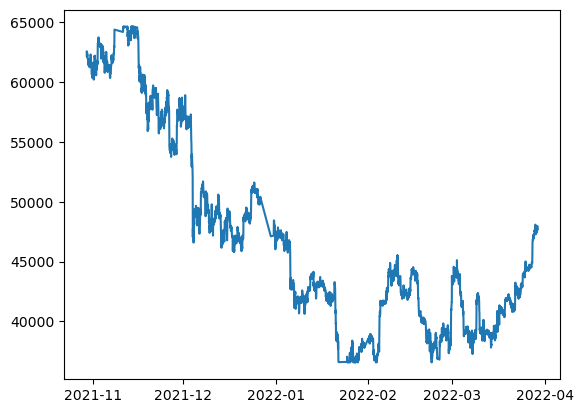

In [7]:
plt.plot(df.index, df['close_1min'] )
plt.show()

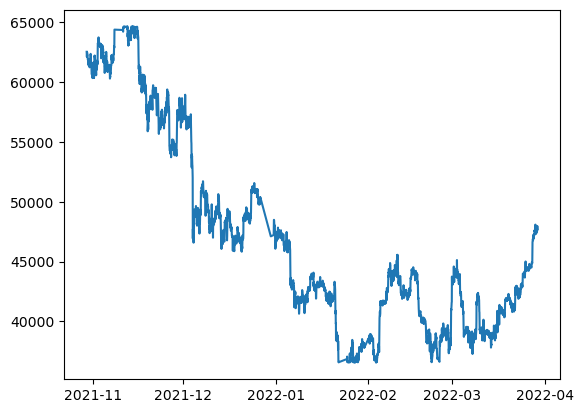

In [8]:
plt.plot(df.index, df['open_1min'])
plt.show()

In [9]:
n_steps = 15
X, y = utils.split_sequence(df['close_1min'], n_steps)
X

array([[62561.86, 62397.57, 62123.32, ..., 61626.1 , 61516.62, 61683.53],
       [62397.57, 62123.32, 62374.66, ..., 61516.62, 61683.53, 61531.11],
       [62123.32, 62374.66, 62480.44, ..., 61683.53, 61531.11, 61383.  ],
       ...,
       [48089.92, 47642.15, 47578.73, ..., 47716.91, 47552.35, 47653.42],
       [47642.15, 47578.73, 47301.08, ..., 47552.35, 47653.42, 47980.  ],
       [47578.73, 47301.08, 47392.23, ..., 47653.42, 47980.  , 47858.52]])

In [10]:
train_X, train_y, valid_X, valid_y, _, _ = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
2742
2742
342
342
344
344
----------------------------------------
----------------------------
-------- Train X: (2742, 15), Train y: (2742,) --------
-------- Valid X: (342, 15), Valid y: (342,) --------
----------------------------



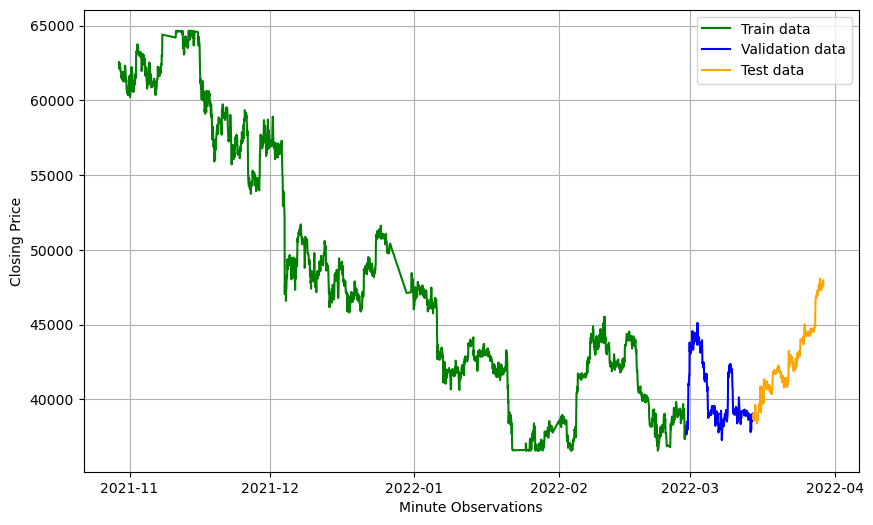

In [11]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df['close_1min'][:len(train_y)], 'green', label='Train data')
plt.plot(df['close_1min'][len(train_y):len(train_y)+len(valid_y)], 'blue', label='Validation data')
plt.plot(df['close_1min'][len(train_y)+len(valid_y):], 'orange', label='Test data')
plt.legend()

In [12]:
total_len = len(train_y)+len(valid_y)
# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(df["close_1min"], order=(4,1,0))
results = model.fit()

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:                 3443
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -24808.010
Date:                Sat, 14 Jan 2023   AIC                          49626.020
Time:                        15:10:12   BIC                          49656.739
Sample:                             0   HQIC                         49636.993
                               - 3443                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0435      0.012     -3.495      0.000      -0.068      -0.019
ar.L2         -0.0011      0.012     -0.093      0.926      -0.024       0.022
ar.L3         -0.0159      0.015     -1.025      0.305      -0.046       0.014
ar.L4          0.0116      0.017      0.695      0.487      -0.021       0.044
sigma2      1.067e+05    779.358    136.877      0.000    1.05e+05    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             76456.86
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
valid_predictions = results.predict(start=len(train_X), end=total_len-1)
valid_predictions

datetime
2022-02-28 03:31:17    38122.002590
2022-02-28 04:32:54    37876.935744
2022-02-28 05:33:28    37841.184556
2022-02-28 06:31:57    37923.338045
2022-02-28 07:33:28    37673.399648
                           ...     
2022-03-14 07:30:25    38527.795370
2022-03-14 08:31:02    38774.652777
2022-03-14 09:30:36    38982.186337
2022-03-14 10:34:24    39019.478520
2022-03-14 11:33:57    39058.439454
Name: predicted_mean, Length: 342, dtype: float64

In [15]:
valid_y

array([41228.63, 41315.42, 41620.9 , 41618.05, 43808.  , 43185.  ,
       43469.24, 43434.35, 43130.43, 43074.88, 43277.94, 43222.84,
       43355.57, 43425.3 , 43565.19, 43320.62, 43417.74, 43528.4 ,
       44574.29, 44541.71, 44129.41, 43409.92, 43335.66, 43782.11,
       43751.51, 43721.57, 44108.77, 43829.12, 44151.35, 44444.14,
       44204.15, 44000.  , 44260.78, 44412.04, 44312.12, 44304.79,
       44012.85, 44026.25, 43882.57, 44000.34, 44168.64, 44225.68,
       43996.94, 43644.55, 45121.67, 44289.09, 44360.94, 43961.02,
       43731.87, 43773.97, 43790.69, 44101.67, 44160.76, 43790.49,
       43844.86, 43719.15, 43701.51, 43441.49, 43466.07, 43125.27,
       43574.13, 43563.43, 43337.03, 43185.  , 43405.03, 43463.39,
       43654.29, 43960.27, 43105.77, 42537.26, 42371.76, 42491.84,
       42388.55, 42177.68, 42119.05, 42416.83, 42466.04, 42118.88,
       41443.63, 41379.59, 41434.25, 41206.14, 41312.8 , 41402.5 ,
       41396.37, 41381.76, 41719.  , 41610.92, 41681.71, 41355

In [16]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df[len(train_X):total_len]['close_1min'], valid_predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 339.490 


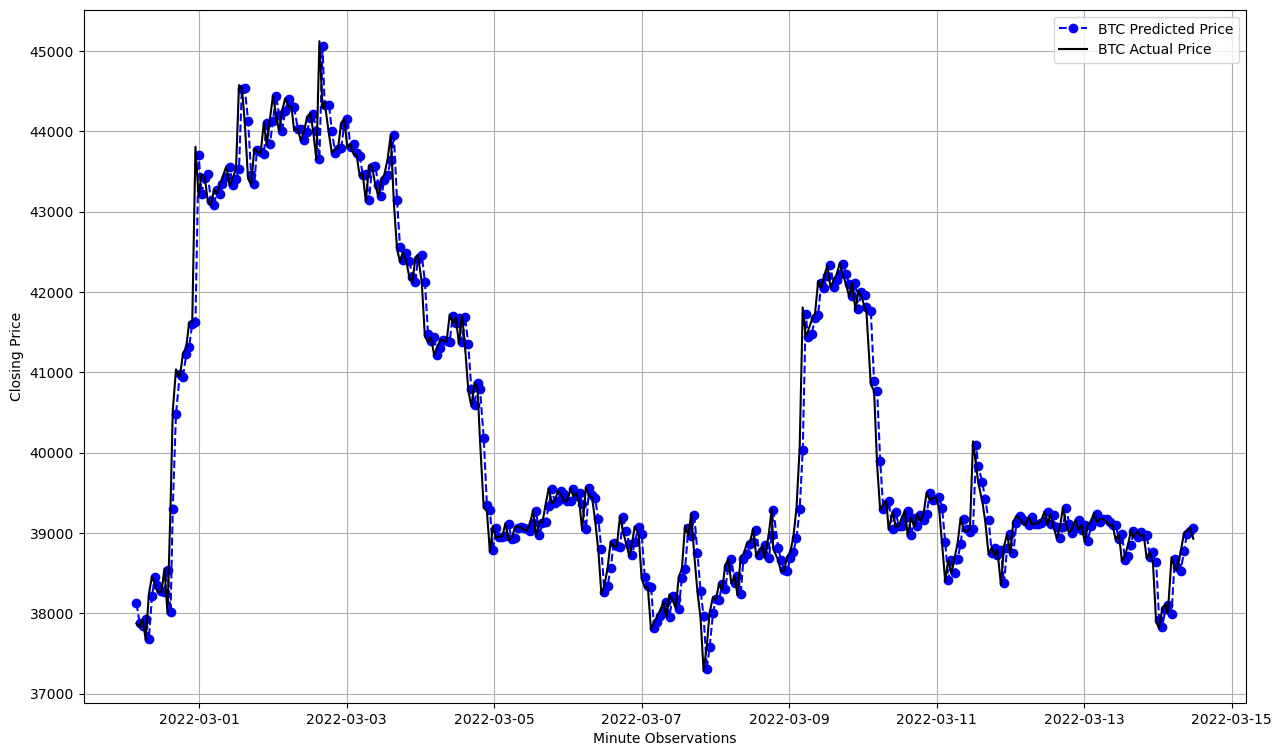

In [17]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(valid_predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df[len(train_X):total_len]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()

In [18]:
test_predictions = results.predict(start=total_len, end=len(df)-1)
test_predictions

datetime
2022-03-14 12:32:32    38935.169791
2022-03-14 13:34:12    38756.161426
2022-03-14 14:37:47    38685.062320
2022-03-14 15:36:23    39012.431834
2022-03-14 16:37:56    38949.620100
                           ...     
2022-03-29 10:16:54    47710.940787
2022-03-29 11:21:32    47558.199100
2022-03-29 12:17:02    47645.735114
2022-03-29 13:17:35    47970.651895
2022-03-29 14:20:16    47859.944646
Name: predicted_mean, Length: 359, dtype: float64

In [19]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df[total_len:]['close_1min'], test_predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 260.896 


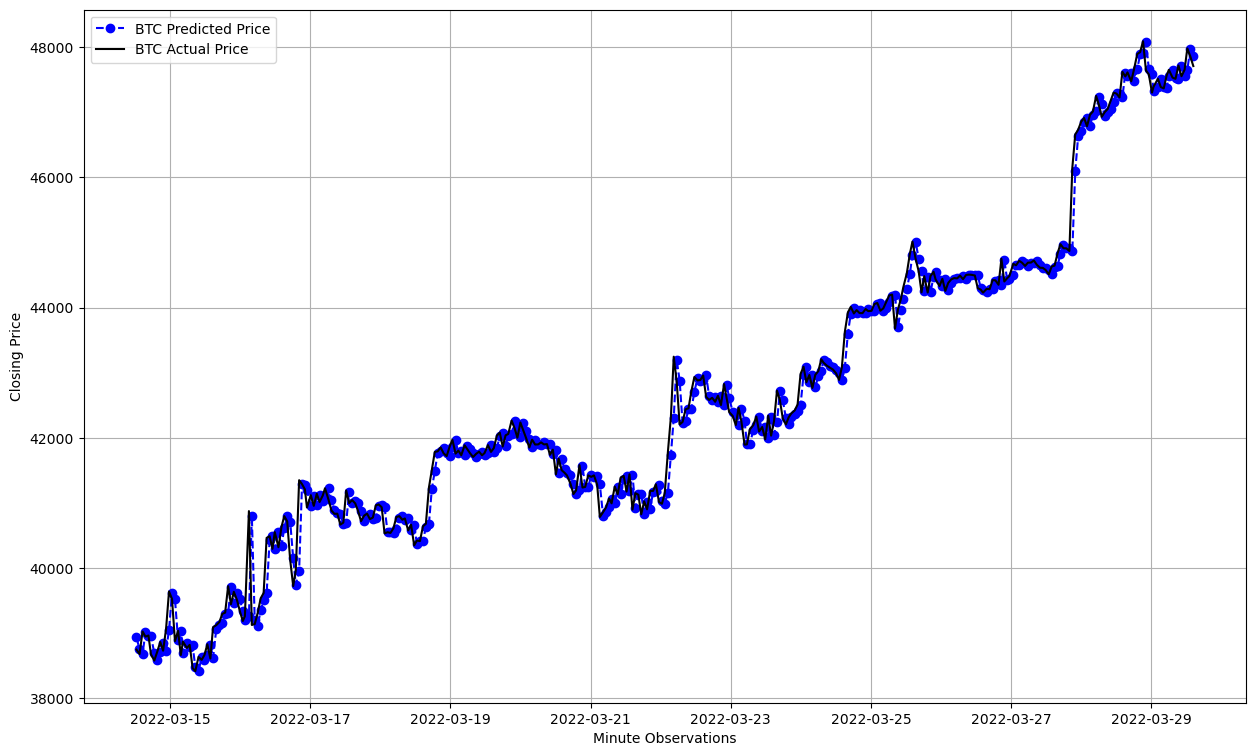

In [20]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(test_predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df[total_len:]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()